In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("datasets/target_molecules_clean.csv")
df.head()

,pIC50,ECFP4_0,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,ECFP4_8,...,ECFP4_2038,ECFP4_2039,ECFP4_2040,ECFP4_2041,ECFP4_2042,ECFP4_2043,ECFP4_2044,ECFP4_2045,ECFP4_2046,ECFP4_2047
0,-0.301030,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.301030,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.301030,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.531653,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4.337242,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Binning pIC50 values into active (1) and inactive (0) classes
threshold = 5.0
df['activity_class'] = (df['pIC50'] >= threshold).astype(int)

# 2. Data Splitting Strategy
# Use stratified splitting based on the activity class
train_data, temp_data = train_test_split(df, test_size=0.3, stratify=df['activity_class'], random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['activity_class'], random_state=42)

X_train_class = train_data.iloc[:, 1:-2]  # Exclude the pIC50 and activity_class columns
y_train_class = train_data['activity_class']

X_valid_class = valid_data.iloc[:, 1:-2]
y_valid_class = valid_data['activity_class']

# 3. Train the Random Forest Classifier with balanced class weights
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# Predict on the validation set and calculate performance metrics
y_pred_class = rf_classifier.predict(X_valid_class)
accuracy = accuracy_score(y_valid_class, y_pred_class)
classification_rep = classification_report(y_valid_class, y_pred_class)
accuracy, classification_rep


(0.8504273504273504,
 '              precision    recall  f1-score   support\n\n           0       0.85      0.95      0.90       167\n           1       0.83      0.60      0.70        67\n\n    accuracy                           0.85       234\n   macro avg       0.84      0.77      0.80       234\nweighted avg       0.85      0.85      0.84       234\n')

In [13]:
# Convert the classification report to a dictionary
report_dict_corrected = classification_report(y_valid_class, y_pred_class, output_dict=True)

# Convert the dictionary to a pandas DataFrame
report_df_corrected = pd.DataFrame(report_dict_corrected).transpose()

report_df_corrected


,precision,recall,f1-score,support
0,0.854839,0.952096,0.900850,167.000000
1,0.833333,0.597015,0.695652,67.000000
accuracy,0.850427,0.850427,0.850427,0.850427
macro avg,0.844086,0.774555,0.798251,234.000000
weighted avg,0.848681,0.850427,0.842097,234.000000


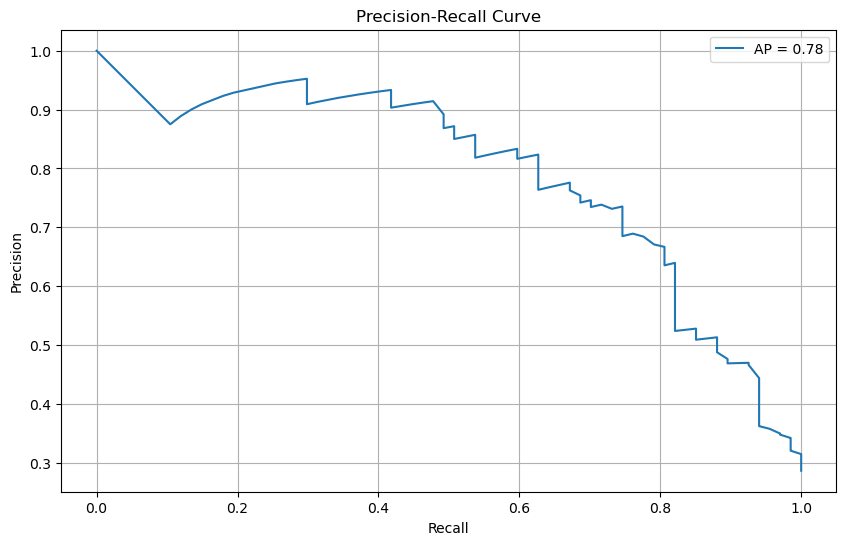

0.85

In [14]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get the probability estimates of the positive class
y_scores = rf_classifier.predict_proba(X_valid_class)[:, 1]

# Compute precision-recall pairs for different thresholds
precision, recall, thresholds = precision_recall_curve(y_valid_class, y_scores)

# Average precision score
avg_precision = average_precision_score(y_valid_class, y_scores)

# Plotting the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Find the threshold that gives the highest precision
best_threshold = thresholds[np.argmax(precision[:-1])]

best_threshold
